## Este ejercicio tiene como objetivo explicar la construccion de un modelo de Redes Neuronales Artificiales Produndas (Deep Network) usando el data set fashin-MNIST

![](https://www.researchgate.net/publication/346702022/figure/fig1/AS:966313367322628@1607398468415/Analogia-entre-el-modelo-biologico-y-el-matematico-de-una-neurona-En-b-se-observa-como.jpg)










In [15]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#Hacemos la carga del set de datos "fashion-MNIST"
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


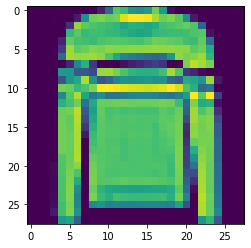

In [16]:
# Imprimimos la forma del conjunto de entrenamiento: tenga en cuenta que hay 60.000 datos de 
# entrenamiento con un tamaño de imagen de 28x28, 60.000 etiquetas)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Imprimos el numero de datos en entrenamiento y prueba
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Definimos las etiquetas del conjunto de datos
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

#Usando el indice de la imagine podemos seleccionar una imagen para mostrar (entre 0 y 59,999)
img_index = 5
# y_train contiene etiquetas que van entre 0 a 9
label_index = y_train[img_index]
# Imprimimos la etiqueta junto a la imagen
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# Mostramos una imagen del set
plt.imshow(x_train[img_index])

In [ ]:
#Dividir entre 255 resulta en normalizar la data asi nos quedan numeros entre 0.0-1.0 ejemplo siendo 0 = 0 y 1 = 255
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train

In [18]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [21]:
#Partimos el dataset de entrenamiento en entrenamiento y validacion 55,000/5,000
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

#Redefinimos la data de (28, 28) a (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode: Transforma nuestros vectores categoricos en 0, 1 segun sea la etiqueta
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (50000, 28, 28, 1) y_train shape: (50000, 10, 10)
50000 train set
5000 validation set
10000 test set


In [6]:
model = tf.keras.Sequential()

# Esta es la arquitectura de nuestra red neuronal
# Debemos notar el INPUT 28,28,1 

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Imprimimos la arquitectura de la red
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [7]:
# Notar que usamos adam como optimizador para la funcion de perdida
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [10]:
from keras.callbacks import ModelCheckpoint

# Model Chekpoint buscara de todas las iteraciones la que tenga mejor rendimiento
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

# Hacemos el entrenamiento de la red
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=2,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/2
860/860 [==============================] - 61s 71ms/step - loss: 0.4379 - accuracy: 0.8421 - val_loss: 0.3310 - val_accuracy: 0.8822

Epoch 00001: val_loss improved from inf to 0.33103, saving model to model.weights.best.hdf5
Epoch 2/2
860/860 [==============================] - 61s 71ms/step - loss: 0.3844 - accuracy: 0.8606 - val_loss: 0.2985 - val_accuracy: 0.8904

Epoch 00002: val_loss improved from 0.33103 to 0.29848, saving model to model.weights.best.hdf5


In [11]:
# Cargamos el modelo final
model.load_weights('model.weights.best.hdf5')

In [12]:
# Hacemos el score con la data de prueba o test
score = model.evaluate(x_test, y_test, verbose=0)

# Imprimimos la precision de nuestro test
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8841999769210815


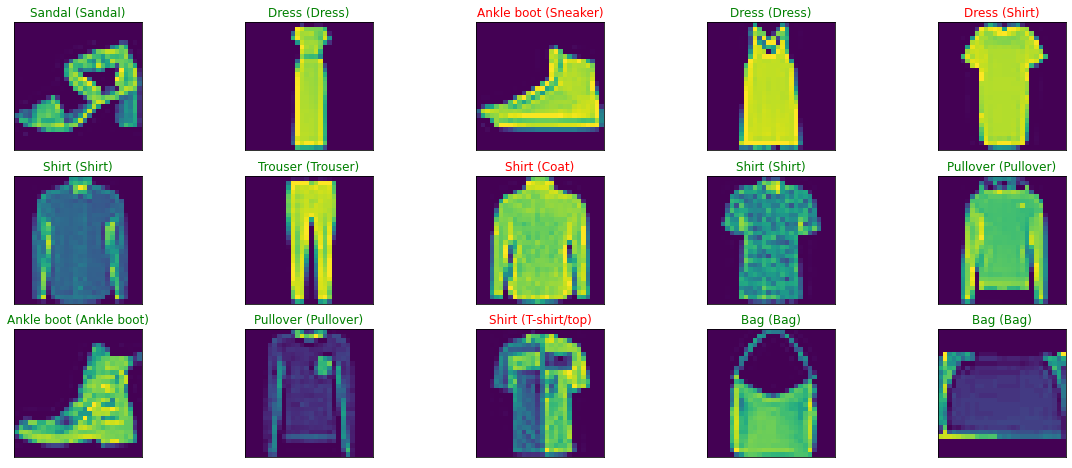

In [13]:
y_hat = model.predict(x_test)

# Imprimimos una muestra aleatoria de nuestro set
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Momstrar cada imagen - (test)
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Poner titulos a las imagenes
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))